# Comprehensive Classification Modeling: Titanic Dataset

This notebook provides a complete end-to-end classification modeling pipeline using the famous Titanic dataset. We'll predict passenger survival using machine learning.

## 🎯 Learning Objectives

1. **Binary Classification Fundamentals**: Understanding the problem type and evaluation metrics
2. **Exploratory Data Analysis**: Uncovering patterns that influence survival
3. **Feature Engineering for Classification**: Creating meaningful features from raw data
4. **Model Selection & Training**: Comparing multiple classification algorithms
5. **Model Evaluation**: Using appropriate metrics for classification problems
6. **Model Interpretation**: Understanding what drives predictions

## 📊 About the Dataset

The Titanic dataset contains information about passengers aboard the RMS Titanic, which sank on April 15, 1912. Our goal is to predict whether a passenger survived (1) or did not survive (0) based on features like:

- **Pclass**: Passenger class (1st, 2nd, 3rd)
- **Sex**: Gender of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Ticket fare
- **Embarked**: Port of embarkation

This is a **supervised binary classification** problem where we learn from historical data to predict outcomes.

## 1. Setup and Data Loading

### 📦 Library Imports and Environment Setup

For classification modeling, we need specialized libraries and metrics different from regression:

**Classification-specific tools:**
- **Classification algorithms**: LogisticRegression, SVM, RandomForest, etc.
- **Classification metrics**: Accuracy, Precision, Recall, F1-score, ROC-AUC
- **Evaluation tools**: Confusion matrix, classification report, ROC curves
- **Preprocessing**: Label encoding, feature scaling for classification

**Why these specific imports:**
- Binary classification requires different evaluation than regression
- Class imbalance is common in real-world classification problems
- Interpretability is crucial for understanding feature importance in predictions

In [3]:
# Import essential libraries for classification modeling
# Data manipulation and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations and array operations

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns            # For statistical data visualization

# Statistical analysis
import warnings                  # To suppress unnecessary warnings
from scipy import stats          # For statistical functions and tests

# Machine Learning libraries from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
# train_test_split: Split data maintaining class distribution
# cross_val_score: Perform stratified k-fold cross-validation for classification
# GridSearchCV: Hyperparameter tuning with cross-validation
# StratifiedKFold: Ensures balanced class distribution in each fold

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# StandardScaler: Standardize features (important for SVM, KNN, Logistic Regression)
# LabelEncoder: Convert categorical labels to numerical values
# OneHotEncoder: Create binary columns for categorical variables

# Classification algorithms
from sklearn.linear_model import LogisticRegression      # Linear classifier with probability output
from sklearn.tree import DecisionTreeClassifier         # Decision tree for interpretable rules
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# RandomForest: Ensemble of trees with voting
# GradientBoosting: Sequential ensemble that corrects previous errors
# AdaBoost: Adaptive boosting that focuses on misclassified samples

from sklearn.svm import SVC                             # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB              # Naive Bayes for probabilistic classification

# Classification-specific metrics and evaluation tools
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,  # Core classification metrics
    confusion_matrix, classification_report,                   # Detailed evaluation reports
    roc_auc_score, roc_curve, precision_recall_curve,        # ROC and PR curves
    ConfusionMatrixDisplay                                     # Visualization of confusion matrix
)

# Advanced gradient boosting libraries (with robust error handling)
xgb_available = False
lgb_available = False

print("🔧 Checking advanced ML libraries availability...")

# XGBoost with comprehensive error handling
try:
    import xgboost as xgb
    xgb_available = True
    print("✅ XGBoost imported successfully - enables powerful gradient boosting for classification")
except ImportError as e:
    print("⚠️  XGBoost not available. Install with: pip install xgboost")
    print(f"   Import error: {str(e)}")
except Exception as e:
    print(f"⚠️  XGBoost import failed due to: {str(e)}")
    print("   This is often due to missing system dependencies or version conflicts")
    print("   The notebook will continue without XGBoost - other models are available")

# LightGBM with comprehensive error handling
try:
    import lightgbm as lgb
    lgb_available = True
    print("✅ LightGBM imported successfully - enables fast gradient boosting for classification")
except ImportError as e:
    print("⚠️  LightGBM not available. Install with: pip install lightgbm")
    print(f"   Import error: {str(e)}")
except Exception as e:
    print(f"⚠️  LightGBM import failed due to: {str(e)}")
    print("   This is often due to missing system dependencies or version conflicts")
    print("   The notebook will continue without LightGBM - other models are available")

# Configure environment settings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set consistent visualization style
plt.style.use('seaborn-v0_8')  # Modern, clean plotting style
sns.set_palette("husl")         # Use attractive color palette

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

print("\n✅ Core libraries imported successfully!")
print(f"📊 XGBoost available: {xgb_available}")
print(f"📊 LightGBM available: {lgb_available}")

if not xgb_available and not lgb_available:
    print("\n💡 Note: Advanced gradient boosting libraries are not available.")
    print("   The notebook will work perfectly with scikit-learn algorithms:")
    print("   • Logistic Regression, Random Forest, Gradient Boosting")
    print("   • SVM, Decision Trees, Naive Bayes, AdaBoost, KNN")
    print("   These provide excellent classification performance!")

print("\n📚 Libraries loaded for comprehensive classification modeling:")
print("   • Data processing: pandas, numpy")
print("   • Visualization: matplotlib, seaborn")
print("   • ML algorithms: 8+ classification models from scikit-learn")
print("   • Classification metrics: accuracy, precision, recall, F1, ROC-AUC")
print("   • Model evaluation: confusion matrix, ROC curves, classification reports")

🔧 Checking advanced ML libraries availability...
⚠️  XGBoost import failed due to: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mozocosmas/Desktop/Projects/Refactor/venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <8E129FE8-EF1C-38EA-A9CF-202782564052> /Users/mozocosmas/Desktop/Projects/Refactor/venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/l

### 📊 Data Loading and Initial Inspection

Loading the Titanic dataset and performing initial quality checks specific to classification:

**Classification-specific checks:**
- **Class distribution**: Are classes balanced or imbalanced?
- **Target variable**: Binary (0/1) or needs encoding?
- **Feature types**: Which features are categorical vs. numerical?
- **Missing values**: Different strategies needed for classification

Understanding class imbalance early is crucial - it affects model selection, evaluation metrics, and sampling strategies.

In [4]:
# Load the Titanic dataset and perform comprehensive initial analysis
# This dataset is perfect for learning binary classification concepts
df = pd.read_csv('datasets/Titanic-Dataset.csv')

print("🚢 Titanic Dataset loaded successfully!")
print(f"Shape: {df.shape} (passengers × features)")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Perform initial data quality checks
print("\n=== DATASET OVERVIEW ====")
print(f"Total passengers: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]} (including target 'Survived')")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Analyze the target variable (Survived) - this is our classification target
target = 'Survived'
print(f"\n=== TARGET VARIABLE ANALYSIS: {target} ====")
survival_counts = df[target].value_counts()
survival_percentages = df[target].value_counts(normalize=True) * 100

print(f"Class distribution:")
print(f"  Did not survive (0): {survival_counts[0]:>3} passengers ({survival_percentages[0]:>5.1f}%)")
print(f"  Survived (1):        {survival_counts[1]:>3} passengers ({survival_percentages[1]:>5.1f}%)")

# Calculate class imbalance ratio
imbalance_ratio = survival_counts[0] / survival_counts[1]
print(f"\n📊 Class Imbalance Analysis:")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1 (non-survivors : survivors)")
if imbalance_ratio > 2:
    print(f"  ⚠️  Moderate class imbalance detected - consider sampling techniques")
elif imbalance_ratio > 5:
    print(f"  🔴 Significant class imbalance - definitely need sampling/weighting")
else:
    print(f"  ✅ Balanced classes - standard metrics will work well")

# Display sample of the data
print("\n=== SAMPLE DATA (First 5 Rows) ====")
print("Preview of passenger data and features:")
display(df.head())

# Quick overview of data types
print(f"\n=== DATA TYPE SUMMARY ====")
print(f"Numerical features: {len(df.select_dtypes(include=[np.number]).columns) - 1}")  # -1 for target
print(f"Categorical features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Target variable type: {df[target].dtype}")

print("\n✅ Initial data loading completed!")
print("Next: We'll explore the relationship between features and survival")

🚢 Titanic Dataset loaded successfully!
Shape: (891, 12) (passengers × features)
Memory usage: 315.03 KB

=== DATASET OVERVIEW ====
Total passengers: 891
Total features: 12 (including target 'Survived')
Duplicate rows: 0

=== TARGET VARIABLE ANALYSIS: Survived ====
Class distribution:
  Did not survive (0): 549 passengers ( 61.6%)
  Survived (1):        342 passengers ( 38.4%)

📊 Class Imbalance Analysis:
  Imbalance ratio: 1.61:1 (non-survivors : survivors)
  ✅ Balanced classes - standard metrics will work well

=== SAMPLE DATA (First 5 Rows) ====
Preview of passenger data and features:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



=== DATA TYPE SUMMARY ====
Numerical features: 6
Categorical features: 5
Target variable type: int64

✅ Initial data loading completed!
Next: We'll explore the relationship between features and survival


## 2. Exploratory Data Analysis

### 🔍 Survival Analysis by Key Features

Understanding the relationship between features and survival is crucial for feature engineering and model interpretation.

**Key relationships to explore:**
- **Gender**: "Women and children first" - was this rule followed?
- **Passenger Class**: Did social status affect survival chances?
- **Age**: Were younger passengers prioritized?
- **Family Size**: Did traveling with family help or hinder survival?

**Why this analysis matters:**
- **Feature Selection**: Strong relationships indicate predictive features
- **Feature Engineering**: Interactions between features may be important
- **Model Interpretation**: Understanding business logic behind predictions
- **Bias Detection**: Identifying potential unfair discrimination in historical data

=== SURVIVAL ANALYSIS BY KEY FEATURES ====


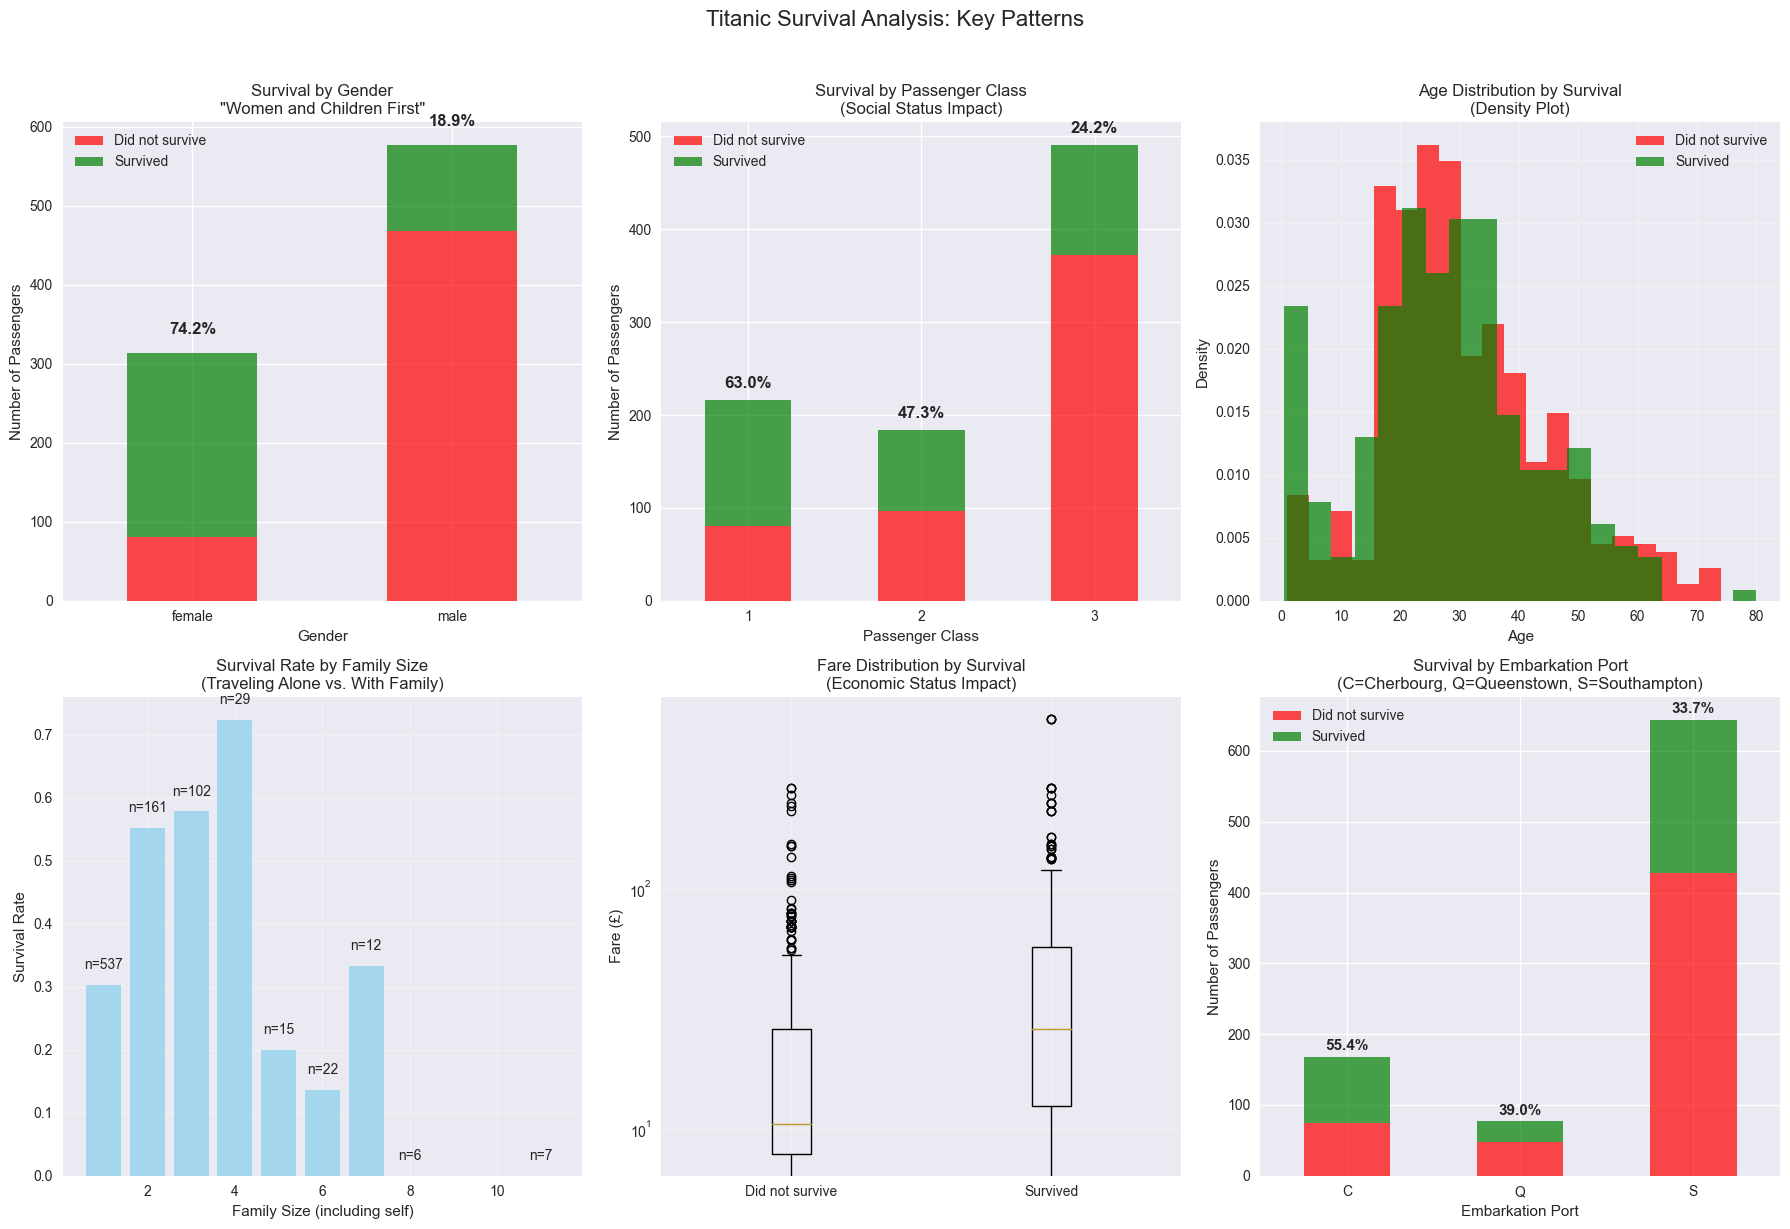


📊 KEY SURVIVAL INSIGHTS:
   👩 Female survival rate: 74.2%
   👨 Male survival rate: 18.9%
   🥇 1st class survival rate: 63.0%
   🥉 3rd class survival rate: 24.2%
   👶 Mean age of survivors: 28.3 years
   💀 Mean age of non-survivors: 30.6 years
   💰 Median fare of survivors: £26.00
   💸 Median fare of non-survivors: £10.50


In [5]:
# Comprehensive survival analysis across key demographic and social features
print("=== SURVIVAL ANALYSIS BY KEY FEATURES ====")

# Create a comprehensive visualization of survival patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Survival Analysis: Key Patterns', fontsize=16, y=1.02)

# 1. Survival by Gender - the most famous pattern
survival_by_gender = df.groupby('Sex')[target].agg(['count', 'sum', 'mean'])
survival_by_gender.columns = ['Total', 'Survived', 'Survival_Rate']
survival_by_gender['Survival_Percentage'] = survival_by_gender['Survival_Rate'] * 100

# Create stacked bar chart for gender
gender_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, ax=axes[0,0], color=['red', 'green'], alpha=0.7)
axes[0,0].set_title('Survival by Gender\n"Women and Children First"')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Number of Passengers')
axes[0,0].legend(['Did not survive', 'Survived'])
axes[0,0].tick_params(axis='x', rotation=0)

# Add percentage annotations
for i, gender in enumerate(['female', 'male']):
    rate = survival_by_gender.loc[gender, 'Survival_Percentage']
    axes[0,0].text(i, gender_counts.loc[gender].sum() + 20, f'{rate:.1f}%', 
                  ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Survival by Passenger Class - social hierarchy impact
class_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_counts.plot(kind='bar', stacked=True, ax=axes[0,1], color=['red', 'green'], alpha=0.7)
axes[0,1].set_title('Survival by Passenger Class\n(Social Status Impact)')
axes[0,1].set_xlabel('Passenger Class')
axes[0,1].set_ylabel('Number of Passengers')
axes[0,1].legend(['Did not survive', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=0)

# Add survival rate annotations
survival_by_class = df.groupby('Pclass')[target].mean() * 100
for i, pclass in enumerate([1, 2, 3]):
    rate = survival_by_class.loc[pclass]
    axes[0,1].text(i, class_counts.loc[pclass].sum() + 10, f'{rate:.1f}%', 
                  ha='center', va='bottom', fontweight='bold', fontsize=12)

# 3. Age distribution by survival - were younger people saved?
# Remove missing ages for this analysis
age_data = df.dropna(subset=['Age'])
survived_ages = age_data[age_data[target] == 1]['Age']
died_ages = age_data[age_data[target] == 0]['Age']

axes[0,2].hist(died_ages, bins=20, alpha=0.7, color='red', label='Did not survive', density=True)
axes[0,2].hist(survived_ages, bins=20, alpha=0.7, color='green', label='Survived', density=True)
axes[0,2].set_title('Age Distribution by Survival\n(Density Plot)')
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('Density')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Family size impact (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
family_survival = df.groupby('FamilySize')[target].agg(['count', 'mean'])
family_survival.columns = ['Count', 'Survival_Rate']
family_survival = family_survival[family_survival['Count'] >= 5]  # Only sizes with sufficient data

bars = axes[1,0].bar(family_survival.index, family_survival['Survival_Rate'], 
                    color='skyblue', alpha=0.7)
axes[1,0].set_title('Survival Rate by Family Size\n(Traveling Alone vs. With Family)')
axes[1,0].set_xlabel('Family Size (including self)')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].grid(True, alpha=0.3)

# Add count annotations
for bar, (size, data) in zip(bars, family_survival.iterrows()):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                  f'n={int(data["Count"])}', ha='center', va='bottom', fontsize=10)

# 5. Fare distribution - wealth impact
fare_data = df.dropna(subset=['Fare'])
survived_fares = fare_data[fare_data[target] == 1]['Fare']
died_fares = fare_data[fare_data[target] == 0]['Fare']

# Use log scale for better visualization due to fare range
axes[1,1].boxplot([died_fares, survived_fares], labels=['Did not survive', 'Survived'])
axes[1,1].set_title('Fare Distribution by Survival\n(Economic Status Impact)')
axes[1,1].set_ylabel('Fare (£)')
axes[1,1].set_yscale('log')
axes[1,1].grid(True, alpha=0.3)

# 6. Embarkation port analysis
embark_counts = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
embark_counts.plot(kind='bar', stacked=True, ax=axes[1,2], color=['red', 'green'], alpha=0.7)
axes[1,2].set_title('Survival by Embarkation Port\n(C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[1,2].set_xlabel('Embarkation Port')
axes[1,2].set_ylabel('Number of Passengers')
axes[1,2].legend(['Did not survive', 'Survived'])
axes[1,2].tick_params(axis='x', rotation=0)

# Add survival rate annotations
survival_by_embarked = df.groupby('Embarked')[target].mean() * 100
for i, port in enumerate(['C', 'Q', 'S']):
    if port in survival_by_embarked.index:
        rate = survival_by_embarked.loc[port]
        axes[1,2].text(i, embark_counts.loc[port].sum() + 5, f'{rate:.1f}%', 
                      ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Print key statistical insights
print("\n📊 KEY SURVIVAL INSIGHTS:")
print(f"   👩 Female survival rate: {survival_by_gender.loc['female', 'Survival_Percentage']:.1f}%")
print(f"   👨 Male survival rate: {survival_by_gender.loc['male', 'Survival_Percentage']:.1f}%")
print(f"   🥇 1st class survival rate: {survival_by_class.loc[1]:.1f}%")
print(f"   🥉 3rd class survival rate: {survival_by_class.loc[3]:.1f}%")
print(f"   👶 Mean age of survivors: {survived_ages.mean():.1f} years")
print(f"   💀 Mean age of non-survivors: {died_ages.mean():.1f} years")
print(f"   💰 Median fare of survivors: £{survived_fares.median():.2f}")
print(f"   💸 Median fare of non-survivors: £{died_fares.median():.2f}")

### 🔍 Missing Values Analysis for Classification

Missing values in classification require careful handling because they can introduce bias and affect model performance.

**Classification-specific considerations:**
- **Missing patterns**: Are missing values random or systematic?
- **Class relationship**: Do missing values correlate with survival?
- **Imputation strategy**: Different approaches for categorical vs. numerical features
- **Feature creation**: Missing indicators can be predictive features themselves

We'll analyze each feature's missing pattern and choose appropriate handling strategies.

=== MISSING VALUES ANALYSIS FOR CLASSIFICATION ====
📊 MISSING VALUES SUMMARY:
Features with missing values: 3
Total missing values: 866

📋 MISSING VALUES BY FEATURE:
Feature         | Missing | %      | Type     | Unique  | Strategy
Cabin           | 687     | 77.1   | object   | 147     | Create 'Unknown' + Deck extraction
Age             | 177     | 19.9   | float64  | 88      | Median by gender/class
Embarked        | 2       | 0.2    | object   | 3       | Mode (most frequent)

🔍 MISSING VALUES vs SURVIVAL RELATIONSHIP:
   Cabin:
      Survival rate with missing Cabin: 30.0%
      Survival rate without missing Cabin: 66.7%
      Difference: 36.7 percentage points
      ⚠️  Significant difference - missing pattern may be predictive!

   Age:
      Survival rate with missing Age: 29.4%
      Survival rate without missing Age: 40.6%
      Difference: 11.2 percentage points
      ⚠️  Significant difference - missing pattern may be predictive!

   Embarked:
      Survival rate with miss

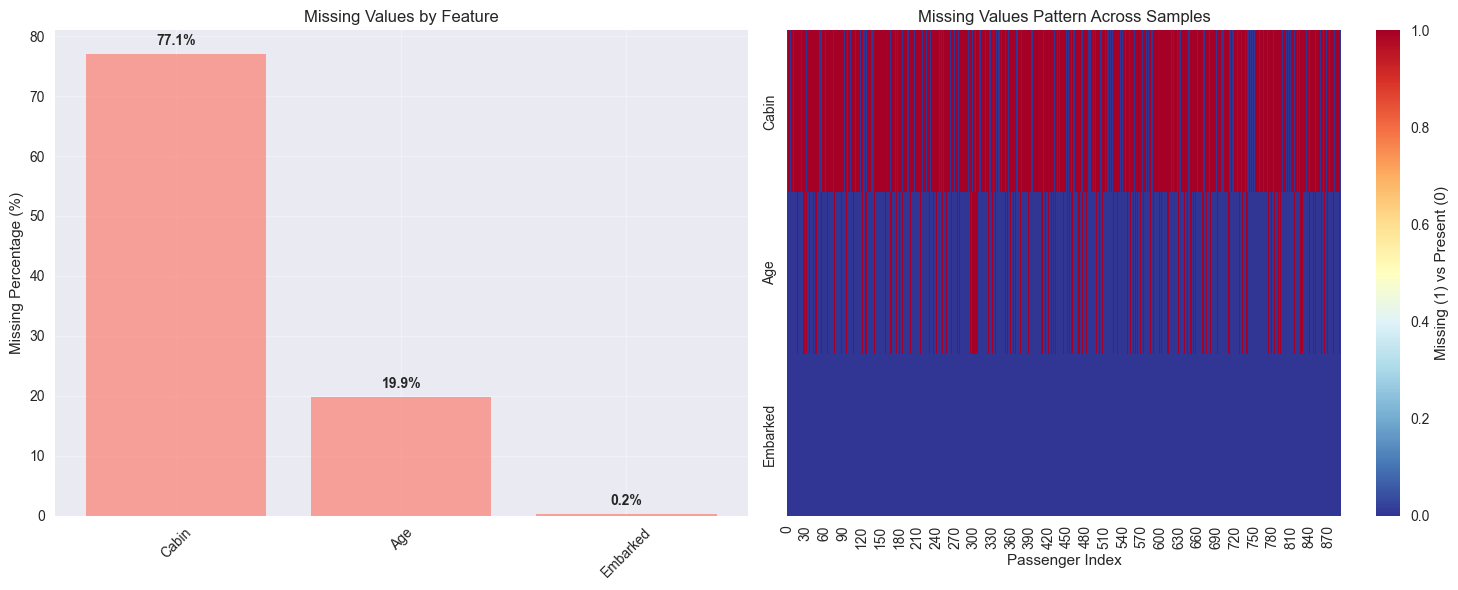


💡 MISSING VALUES STRATEGY:
   • Age: Use median imputation grouped by gender and class (captures demographic patterns)
   • Cabin: Create 'Unknown' category + extract deck information if available
   • Embarked: Use mode imputation (most frequent port)
   • Create missing indicators: Binary features indicating if original value was missing
   • Validate: Check if missing patterns correlate with survival for feature engineering


In [6]:
# Comprehensive missing values analysis for classification context
print("=== MISSING VALUES ANALYSIS FOR CLASSIFICATION ====")

# Create comprehensive missing values report
missing_analysis = pd.DataFrame({
    'Feature': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes,
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

# Focus on features with missing values
missing_features = missing_analysis[missing_analysis['Missing_Count'] > 0].copy()
missing_features = missing_features.sort_values('Missing_Percentage', ascending=False)

print(f"📊 MISSING VALUES SUMMARY:")
print(f"Features with missing values: {len(missing_features)}")
print(f"Total missing values: {missing_features['Missing_Count'].sum():,}")

if len(missing_features) > 0:
    print(f"\n📋 MISSING VALUES BY FEATURE:")
    print("=" * 85)
    print(f"{'Feature':<15} | {'Missing':<7} | {'%':<6} | {'Type':<8} | {'Unique':<7} | Strategy")
    print("=" * 85)
    
    for _, row in missing_features.iterrows():
        feature = row['Feature']
        missing_count = int(row['Missing_Count'])
        missing_pct = row['Missing_Percentage']
        data_type = str(row['Data_Type'])
        unique_vals = int(row['Unique_Values'])
        
        # Determine strategy based on feature characteristics
        if feature == 'Age':
            strategy = "Median by gender/class"
        elif feature == 'Cabin':
            strategy = "Create 'Unknown' + Deck extraction"
        elif feature == 'Embarked':
            strategy = "Mode (most frequent)"
        elif feature == 'Fare':
            strategy = "Median by class"
        else:
            strategy = "To be determined"
        
        print(f"{feature:<15} | {missing_count:<7} | {missing_pct:<6.1f} | {data_type[:8]:<8} | {unique_vals:<7} | {strategy}")
    
    # Analyze relationship between missing values and survival
    print(f"\n🔍 MISSING VALUES vs SURVIVAL RELATIONSHIP:")
    for feature in missing_features['Feature']:
        if feature != target:  # Don't analyze target against itself
            missing_mask = df[feature].isnull()
            survival_with_missing = df[missing_mask][target].mean() if missing_mask.sum() > 0 else 0
            survival_without_missing = df[~missing_mask][target].mean()
            
            difference = abs(survival_with_missing - survival_without_missing) * 100
            
            print(f"   {feature}:")
            print(f"      Survival rate with missing {feature}: {survival_with_missing*100:.1f}%")
            print(f"      Survival rate without missing {feature}: {survival_without_missing*100:.1f}%")
            print(f"      Difference: {difference:.1f} percentage points")
            
            if difference > 5:
                print(f"      ⚠️  Significant difference - missing pattern may be predictive!")
            print()

    # Visualize missing values pattern
    if len(missing_features) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Missing values bar chart
        axes[0].bar(missing_features['Feature'], missing_features['Missing_Percentage'], 
                   color='salmon', alpha=0.7)
        axes[0].set_title('Missing Values by Feature')
        axes[0].set_ylabel('Missing Percentage (%)')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(True, alpha=0.3)
        
        # Add percentage labels
        for i, (feature, pct) in enumerate(zip(missing_features['Feature'], missing_features['Missing_Percentage'])):
            axes[0].text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # Missing values heatmap
        missing_matrix = df[missing_features['Feature']].isnull().astype(int)
        if len(missing_matrix.columns) > 1:
            sns.heatmap(missing_matrix.T, cmap='RdYlBu_r', cbar_kws={'label': 'Missing (1) vs Present (0)'}, ax=axes[1])
            axes[1].set_title('Missing Values Pattern Across Samples')
            axes[1].set_xlabel('Passenger Index')
        else:
            axes[1].text(0.5, 0.5, 'Only one feature\nwith missing values', 
                        transform=axes[1].transAxes, ha='center', va='center')
            axes[1].set_title('Missing Values Pattern')
        
        plt.tight_layout()
        plt.show()

else:
    print("✅ Excellent! No missing values found in the dataset!")

print(f"\n💡 MISSING VALUES STRATEGY:")
print(f"   • Age: Use median imputation grouped by gender and class (captures demographic patterns)")
print(f"   • Cabin: Create 'Unknown' category + extract deck information if available")
print(f"   • Embarked: Use mode imputation (most frequent port)")
print(f"   • Create missing indicators: Binary features indicating if original value was missing")
print(f"   • Validate: Check if missing patterns correlate with survival for feature engineering")

## 3. Feature Engineering for Classification

Feature engineering for classification focuses on creating features that help distinguish between classes (survived vs. didn't survive).

**Classification-specific feature engineering:**

1. **Categorical Encoding**: Converting text categories to numerical representations
2. **Feature Interactions**: Combining features that work together (e.g., Age × Gender)
3. **Binning/Grouping**: Converting continuous variables to categories when relationships are non-linear
4. **Domain Knowledge**: Creating features based on historical context (\"Women and children first\")"

### 🔧 Data Preprocessing and Feature Creation

This section handles missing values and creates new features that can improve classification performance.

**Key preprocessing steps:**
- **Strategic missing value handling**: Different approaches for each feature type
- **Feature creation**: Building new predictive features from existing data
- **Categorical encoding**: Converting text to numbers for machine learning
- **Feature scaling**: Normalizing numerical features for certain algorithms

In [7]:
# Comprehensive feature engineering and preprocessing for classification
# Create a copy of the dataset for feature engineering
df_processed = df.copy()

print("=== FEATURE ENGINEERING FOR CLASSIFICATION ===")

# 1. Handle missing values strategically
print("\n🔧 Step 1: Strategic Missing Value Handling")

# Age: Fill with median grouped by gender and passenger class
# This preserves demographic patterns that affect survival
age_median_by_group = df_processed.groupby(['Sex', 'Pclass'])['Age'].median()
print(f"   Age missing values: {df_processed['Age'].isnull().sum()}")

def fill_age(row):
    if pd.isna(row['Age']):
        return age_median_by_group[(row['Sex'], row['Pclass'])]
    return row['Age']

df_processed['Age'] = df_processed.apply(fill_age, axis=1)
print(f"   ✅ Age filled with median by gender and class")

# Embarked: Fill with mode (most frequent value)
embarked_mode = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(embarked_mode, inplace=True)
print(f"   ✅ Embarked filled with mode: '{embarked_mode}'")

# Cabin: Create 'Unknown' category and extract deck information
cabin_missing = df_processed['Cabin'].isnull().sum()
df_processed['Cabin_Known'] = df_processed['Cabin'].notna().astype(int)  # Binary: has cabin info or not
df_processed['Deck'] = df_processed['Cabin'].str[0]  # Extract first letter (deck)
df_processed['Deck'].fillna('Unknown', inplace=True)
print(f"   ✅ Cabin: Created binary indicator and extracted deck information")

# Fare: Fill with median by passenger class
fare_median_by_class = df_processed.groupby('Pclass')['Fare'].median()
def fill_fare(row):
    if pd.isna(row['Fare']):
        return fare_median_by_class[row['Pclass']]
    return row['Fare']

df_processed['Fare'] = df_processed.apply(fill_fare, axis=1)
print(f"   ✅ Fare filled with median by passenger class")

print(f"   Total missing values after processing: {df_processed.isnull().sum().sum()}")\n\n# 2. Create new meaningful features\nprint(\"\\n🎯 Step 2: Feature Creation Based on Domain Knowledge\")\n\n# Family size (important for survival - traveling alone vs. with family)\ndf_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1\ndf_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)\nprint(f\"   ✅ Created FamilySize and IsAlone features\")\n\n# Age groups (children, adults, elderly - \"women and children first\" rule)\ndef categorize_age(age):\n    if age < 16:\n        return 'Child'\n    elif age < 60:\n        return 'Adult'\n    else:\n        return 'Elderly'\n\ndf_processed['AgeGroup'] = df_processed['Age'].apply(categorize_age)\nprint(f\"   ✅ Created AgeGroup categories: Child, Adult, Elderly\")\n\n# Fare per person (economic status accounting for family size)\ndf_processed['FarePerPerson'] = df_processed['Fare'] / df_processed['FamilySize']\nprint(f\"   ✅ Created FarePerPerson feature\")\n\n# Title extraction from Name (social status indicator)\ndef extract_title(name):\n    if ',' not in name:\n        return 'Unknown'\n    title = name.split(',')[1].split('.')[0].strip()\n    \n    # Group rare titles\n    if title in ['Mr']:\n        return 'Mr'\n    elif title in ['Miss', 'Mlle', 'Ms']:\n        return 'Miss'\n    elif title in ['Mrs', 'Mme']:\n        return 'Mrs'\n    elif title in ['Master']:\n        return 'Master'\n    elif title in ['Dr', 'Rev', 'Col', 'Major', 'Capt']:\n        return 'Officer'\n    elif title in ['Countess', 'Lady', 'Sir', 'Don', 'Dona', 'Jonkheer']:\n        return 'Nobility'\n    else:\n        return 'Other'\n\ndf_processed['Title'] = df_processed['Name'].apply(extract_title)\nprint(f\"   ✅ Extracted and grouped titles from passenger names\")\n\n# Interaction features (combinations that might be predictive)\ndf_processed['Gender_Class'] = df_processed['Sex'] + '_' + df_processed['Pclass'].astype(str)\nprint(f\"   ✅ Created Gender_Class interaction feature\")\n\n# Display feature engineering summary\nprint(f\"\\n📊 FEATURE ENGINEERING SUMMARY:\")\nprint(f\"   Original features: {df.shape[1]}\")\nprint(f\"   New features created: {df_processed.shape[1] - df.shape[1]}\")\nprint(f\"   Total features: {df_processed.shape[1]}\")\n\n# Show sample of new features\nprint(f\"\\n📋 SAMPLE OF ENGINEERED FEATURES:\")\nnew_features = ['FamilySize', 'IsAlone', 'AgeGroup', 'FarePerPerson', 'Title', 'Deck', 'Cabin_Known', 'Gender_Class']\ndisplay(df_processed[new_features + [target]].head(10))\n\n# Analyze the predictive power of new features\nprint(f\"\\n🎯 SURVIVAL RATES BY NEW FEATURES:\")\nfor feature in ['IsAlone', 'AgeGroup', 'Title']:\n    if feature in df_processed.columns:\n        survival_by_feature = df_processed.groupby(feature)[target].agg(['count', 'mean'])\n        survival_by_feature.columns = ['Count', 'Survival_Rate']\n        survival_by_feature['Survival_Percentage'] = survival_by_feature['Survival_Rate'] * 100\n        \n        print(f\"\\n   {feature}:\")\n        for idx, row in survival_by_feature.iterrows():\n            print(f\"      {idx}: {row['Survival_Percentage']:.1f}% (n={int(row['Count'])})\")\n\nprint(f\"\\n✅ Feature engineering completed successfully!\")\nprint(f\"Next: We'll encode categorical variables and prepare for modeling\")"

SyntaxError: incomplete input (1249573518.py, line 45)

### 🎯 Data Preparation for Machine Learning

Converting our engineered features into a format suitable for machine learning algorithms.

**Key preparation steps:**
- **Categorical encoding**: Converting text categories to numerical representations
- **Feature selection**: Choosing the most relevant features for modeling
- **Data splitting**: Creating train/test sets with stratified sampling (preserves class distribution)
- **Feature scaling**: Normalizing numerical features for distance-based algorithms

**Why stratified splitting matters:**
In classification, we want both training and test sets to have similar class distributions to ensure fair evaluation.

In [ ]:
# Prepare data for machine learning algorithms\nprint(\"=== DATA PREPARATION FOR MACHINE LEARNING ===\")\n\n# 1. Select features for modeling (exclude non-predictive columns)\nprint(\"\\n🎯 Step 1: Feature Selection\")\n\n# Remove non-predictive features\nexclude_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']  # ID fields and raw text\nfeatures_to_keep = [col for col in df_processed.columns if col not in exclude_features + [target]]\n\nprint(f\"   Excluded features: {exclude_features}\")\nprint(f\"   Features for modeling: {len(features_to_keep)}\")\nprint(f\"   Selected features: {features_to_keep}\")\n\n# Create feature matrix and target vector\nX = df_processed[features_to_keep].copy()\ny = df_processed[target].copy()\n\nprint(f\"   Feature matrix shape: {X.shape}\")\nprint(f\"   Target vector shape: {y.shape}\")\n\n# 2. Handle categorical variables with encoding\nprint(\"\\n🔧 Step 2: Categorical Variable Encoding\")\n\n# Identify categorical and numerical columns\ncategorical_features = X.select_dtypes(include=['object']).columns.tolist()\nnumerical_features = X.select_dtypes(include=[np.number]).columns.tolist()\n\nprint(f\"   Categorical features ({len(categorical_features)}): {categorical_features}\")\nprint(f\"   Numerical features ({len(numerical_features)}): {numerical_features}\")\n\n# Apply one-hot encoding to categorical features\nX_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, drop_first=True)\n\nprint(f\"   ✅ Applied one-hot encoding\")\nprint(f\"   Features after encoding: {X_encoded.shape[1]} (was {X.shape[1]})\")\nprint(f\"   New feature names (first 10): {list(X_encoded.columns[:10])}\")\n\n# 3. Split data with stratification (preserves class distribution)\nprint(\"\\n🎲 Step 3: Train-Test Split with Stratification\")\n\nX_train, X_test, y_train, y_test = train_test_split(\n    X_encoded, y, \n    test_size=0.2,      # 80% training, 20% testing\n    random_state=42,    # For reproducibility\n    stratify=y          # Maintains class distribution in both sets\n)\n\nprint(f\"   Training set: {X_train.shape[0]} passengers ({X_train.shape[0]/len(X_encoded)*100:.1f}%)\")\nprint(f\"   Test set: {X_test.shape[0]} passengers ({X_test.shape[0]/len(X_encoded)*100:.1f}%)\")\n\n# Verify class distribution is preserved\ntrain_survival_rate = y_train.mean() * 100\ntest_survival_rate = y_test.mean() * 100\noriginal_survival_rate = y.mean() * 100\n\nprint(f\"\\n   📊 Class Distribution Verification:\")\nprint(f\"      Original survival rate: {original_survival_rate:.1f}%\")\nprint(f\"      Training survival rate: {train_survival_rate:.1f}%\")\nprint(f\"      Test survival rate: {test_survival_rate:.1f}%\")\nprint(f\"      ✅ Distribution preserved: {abs(train_survival_rate - test_survival_rate) < 2}\")\n\n# 4. Feature scaling for algorithms that need it\nprint(\"\\n⚖️ Step 4: Feature Scaling\")\n\n# Some algorithms (SVM, KNN, Logistic Regression) are sensitive to feature scales\n# Tree-based algorithms (Random Forest, Decision Trees) don't need scaling\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\nprint(f\"   ✅ Applied StandardScaler (mean=0, std=1)\")\nprint(f\"   Scaled features shape: {X_train_scaled.shape}\")\nprint(f\"   Feature means after scaling (first 5): {X_train_scaled.mean(axis=0)[:5].round(6)}\")\nprint(f\"   Feature stds after scaling (first 5): {X_train_scaled.std(axis=0)[:5].round(6)}\")\n\n# 5. Display final dataset summary\nprint(f\"\\n📊 FINAL DATASET SUMMARY:\")\nprint(f\"   Total passengers: {len(X_encoded)}\")\nprint(f\"   Features after encoding: {X_encoded.shape[1]}\")\nprint(f\"   Training samples: {X_train.shape[0]}\")\nprint(f\"   Test samples: {X_test.shape[0]}\")\nprint(f\"   Class balance (survived): {original_survival_rate:.1f}%\")\n\n# Show a sample of the final encoded features\nprint(f\"\\n📋 SAMPLE OF FINAL ENCODED FEATURES:\")\ndisplay(pd.DataFrame(X_train_scaled[:5], columns=X_encoded.columns).round(3))\n\nprint(f\"\\n✅ Data preparation completed successfully!\")\nprint(f\"Next: We'll train multiple classification models and compare their performance\")"

## 4. Model Selection and Training

We'll train multiple classification algorithms and compare their performance using cross-validation.

**Classification algorithms to test:**

1. **Logistic Regression**: Linear classifier with probability outputs - good baseline
2. **Decision Tree**: Rule-based classifier - highly interpretable 
3. **Random Forest**: Ensemble of trees - reduces overfitting
4. **Gradient Boosting**: Sequential ensemble - often high performance
5. **Support Vector Machine**: Finds optimal decision boundary
6. **K-Nearest Neighbors**: Instance-based learning
7. **Naive Bayes**: Probabilistic classifier assuming feature independence

**Why test multiple models:**
- Different algorithms work better for different data patterns
- Ensemble methods often outperform single models
- Some models are more interpretable than others
- Cross-validation gives us robust performance estimates

In [ ]:
# Train and compare multiple classification algorithms\nprint(\"=== MODEL SELECTION AND TRAINING ===\")\n\n# Define classification models to test\n# Each model has different strengths and assumptions\nmodels = {\n    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),\n    'Decision Tree': DecisionTreeClassifier(random_state=42),\n    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),\n    'Gradient Boosting': GradientBoostingClassifier(random_state=42),\n    'SVM': SVC(random_state=42, probability=True),  # probability=True for ROC curves\n    'KNN': KNeighborsClassifier(n_neighbors=5),\n    'Naive Bayes': GaussianNB(),\n    'AdaBoost': AdaBoostClassifier(random_state=42)\n}\n\n# Add XGBoost and LightGBM if available\nif xgb_available:\n    models['XGBoost'] = xgb.XGBClassifier(random_state=42, eval_metric='logloss')\n\nif lgb_available:\n    models['LightGBM'] = lgb.LGBMClassifier(random_state=42, verbose=-1)\n\nprint(f\"\\n🤖 Training {len(models)} classification models:\")\nfor name in models.keys():\n    print(f\"   • {name}\")\n\n# Models that need scaled features (distance-based algorithms)\nscaled_models = ['Logistic Regression', 'SVM', 'KNN']\n\n# Perform cross-validation for each model\nprint(f\"\\n🔄 Performing 5-fold stratified cross-validation...\")\nprint(f\"\\nModel Performance (Cross-Validation):\")\nprint(f\"{'='*65}\")\nprint(f\"{'Model':<18} | {'Accuracy':<8} | {'Precision':<9} | {'Recall':<8} | {'F1-Score':<8}\")\nprint(f\"{'='*65}\")\n\nmodel_results = []\n\nfor name, model in models.items():\n    print(f\"\\n   Training {name}...\", end=\" \")\n    \n    try:\n        # Choose appropriate data (scaled or unscaled)\n        if name in scaled_models:\n            X_train_input = X_train_scaled\n        else:\n            X_train_input = X_train\n        \n        # Use StratifiedKFold to maintain class distribution in each fold\n        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n        \n        # Calculate multiple metrics using cross-validation\n        accuracy_scores = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='accuracy')\n        precision_scores = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='precision')\n        recall_scores = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='recall')\n        f1_scores = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='f1')\n        \n        # Store results\n        result = {\n            'Model': name,\n            'Accuracy': accuracy_scores.mean(),\n            'Accuracy_Std': accuracy_scores.std(),\n            'Precision': precision_scores.mean(),\n            'Precision_Std': precision_scores.std(),\n            'Recall': recall_scores.mean(),\n            'Recall_Std': recall_scores.std(),\n            'F1': f1_scores.mean(),\n            'F1_Std': f1_scores.std()\n        }\n        \n        model_results.append(result)\n        \n        # Print results in formatted table\n        print(f\"✅\")\n        print(f\"{name:<18} | {result['Accuracy']:<8.3f} | {result['Precision']:<9.3f} | {result['Recall']:<8.3f} | {result['F1']:<8.3f}\")\n        \n    except Exception as e:\n        print(f\"❌ Error: {str(e)[:50]}\")\n\nprint(f\"\\n{'='*65}\")\n\n# Convert results to DataFrame for easy analysis\nresults_df = pd.DataFrame(model_results)\nresults_df = results_df.sort_values('Accuracy', ascending=False)\n\nprint(f\"\\n🏆 MODEL RANKING BY ACCURACY:\")\nfor i, (_, row) in enumerate(results_df.iterrows(), 1):\n    print(f\"   {i}. {row['Model']:<18}: {row['Accuracy']:.3f} (±{row['Accuracy_Std']:.3f})\")\n\n# Visualize model comparison\nfig, axes = plt.subplots(2, 2, figsize=(15, 12))\nfig.suptitle('Classification Models Comparison (Cross-Validation)', fontsize=16)\n\nmetrics = ['Accuracy', 'Precision', 'Recall', 'F1']\nfor i, metric in enumerate(metrics):\n    ax = axes[i//2, i%2]\n    \n    # Create bar plot\n    bars = ax.bar(range(len(results_df)), results_df[metric], \n                 color='skyblue', alpha=0.7, capsize=5,\n                 yerr=results_df[f'{metric}_Std'])\n    \n    ax.set_title(f'{metric} Score')\n    ax.set_xlabel('Models')\n    ax.set_ylabel(f'{metric}')\n    ax.set_xticks(range(len(results_df)))\n    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')\n    ax.grid(True, alpha=0.3)\n    \n    # Add value labels on bars\n    for bar, value in zip(bars, results_df[metric]):\n        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, \n               f'{value:.3f}', ha='center', va='bottom', fontsize=9)\n\nplt.tight_layout()\nplt.show()\n\n# Select top 3 models for further evaluation\ntop_models = results_df.head(3)['Model'].tolist()\nprint(f\"\\n🎯 TOP 3 MODELS SELECTED FOR DETAILED EVALUATION:\")\nfor i, model_name in enumerate(top_models, 1):\n    model_stats = results_df[results_df['Model'] == model_name].iloc[0]\n    print(f\"   {i}. {model_name}:\")\n    print(f\"      Accuracy: {model_stats['Accuracy']:.3f} (±{model_stats['Accuracy_Std']:.3f})\")\n    print(f\"      F1-Score: {model_stats['F1']:.3f} (±{model_stats['F1_Std']:.3f})\")\n\nprint(f\"\\n✅ Model training and initial evaluation completed!\")\nprint(f\"Next: We'll perform detailed evaluation on the test set\")"

## 5. Model Evaluation and Interpretation

Comprehensive evaluation of our best performing models on the test set.

**Classification evaluation includes:**

1. **Confusion Matrix**: Shows true positives, false positives, true negatives, false negatives
2. **Classification Report**: Detailed metrics for each class
3. **ROC Curve**: True Positive Rate vs False Positive Rate
4. **Feature Importance**: Understanding what drives predictions
5. **Prediction Examples**: Interpreting individual predictions

**Why comprehensive evaluation matters:**
- Accuracy alone can be misleading with imbalanced classes
- Precision and recall trade-offs are important for business decisions
- Understanding feature importance builds trust and insights
- ROC curves help choose optimal probability thresholds

In [ ]:
# Comprehensive evaluation of top models on test set\nprint(\"=== COMPREHENSIVE MODEL EVALUATION ===\")\n\n# Train top models on full training set and evaluate on test set\nbest_models_trained = {}\nevaluation_results = []\n\nprint(f\"\\n🎯 Training top {len(top_models)} models on full training set...\")\n\nfor model_name in top_models:\n    print(f\"\\n   Training {model_name}...\")\n    \n    # Get the model\n    model = models[model_name]\n    \n    # Choose appropriate training data\n    if model_name in scaled_models:\n        X_train_input = X_train_scaled\n        X_test_input = X_test_scaled\n    else:\n        X_train_input = X_train\n        X_test_input = X_test\n    \n    # Train on full training set\n    model.fit(X_train_input, y_train)\n    \n    # Make predictions\n    y_pred = model.predict(X_test_input)\n    y_pred_proba = model.predict_proba(X_test_input)[:, 1]  # Probability of survival\n    \n    # Calculate comprehensive metrics\n    accuracy = accuracy_score(y_test, y_pred)\n    precision = precision_score(y_test, y_pred)\n    recall = recall_score(y_test, y_pred)\n    f1 = f1_score(y_test, y_pred)\n    roc_auc = roc_auc_score(y_test, y_pred_proba)\n    \n    # Store results\n    evaluation_results.append({\n        'Model': model_name,\n        'Accuracy': accuracy,\n        'Precision': precision,\n        'Recall': recall,\n        'F1_Score': f1,\n        'ROC_AUC': roc_auc,\n        'Predictions': y_pred,\n        'Probabilities': y_pred_proba\n    })\n    \n    # Store trained model\n    best_models_trained[model_name] = model\n    \n    print(f\"      ✅ Test Accuracy: {accuracy:.3f}\")\n    print(f\"      ✅ Test F1-Score: {f1:.3f}\")\n    print(f\"      ✅ Test ROC-AUC: {roc_auc:.3f}\")\n\n# Display comprehensive results table\nprint(f\"\\n📊 DETAILED TEST SET RESULTS:\")\nprint(f\"{'='*80}\")\nprint(f\"{'Model':<18} | {'Accuracy':<8} | {'Precision':<9} | {'Recall':<8} | {'F1-Score':<8} | {'ROC-AUC':<8}\")\nprint(f\"{'='*80}\")\n\nfor result in evaluation_results:\n    print(f\"{result['Model']:<18} | {result['Accuracy']:<8.3f} | {result['Precision']:<9.3f} | \"\n          f\"{result['Recall']:<8.3f} | {result['F1_Score']:<8.3f} | {result['ROC_AUC']:<8.3f}\")\n\nprint(f\"{'='*80}\")\n\n# Select the best model based on F1-score (balances precision and recall)\nbest_result = max(evaluation_results, key=lambda x: x['F1_Score'])\nbest_model_name = best_result['Model']\nbest_model = best_models_trained[best_model_name]\n\nprint(f\"\\n🏆 BEST MODEL: {best_model_name}\")\nprint(f\"   F1-Score: {best_result['F1_Score']:.3f}\")\nprint(f\"   ROC-AUC: {best_result['ROC_AUC']:.3f}\")\nprint(f\"   Accuracy: {best_result['Accuracy']:.3f}\")\n\n# Detailed analysis of the best model\nprint(f\"\\n🔍 DETAILED ANALYSIS: {best_model_name}\")\n\n# Choose appropriate test data\nif best_model_name in scaled_models:\n    X_test_final = X_test_scaled\nelse:\n    X_test_final = X_test\n\ny_pred_best = best_result['Predictions']\ny_pred_proba_best = best_result['Probabilities']\n\n# Confusion Matrix\nprint(f\"\\n📊 Confusion Matrix:\")\ncm = confusion_matrix(y_test, y_pred_best)\nprint(f\"                 Predicted\")\nprint(f\"               No  Yes\")\nprint(f\"Actual No    {cm[0,0]:4d} {cm[0,1]:4d}\")\nprint(f\"       Yes   {cm[1,0]:4d} {cm[1,1]:4d}\")\n\n# Classification Report\nprint(f\"\\n📋 Classification Report:\")\nprint(classification_report(y_test, y_pred_best, target_names=['Did not survive', 'Survived']))\n\n# Visualizations\nfig, axes = plt.subplots(2, 3, figsize=(18, 12))\nfig.suptitle(f'Comprehensive Evaluation: {best_model_name}', fontsize=16)\n\n# 1. Confusion Matrix Heatmap\nConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, ax=axes[0,0], cmap='Blues')\naxes[0,0].set_title('Confusion Matrix')\n\n# 2. ROC Curve\nfpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)\naxes[0,1].plot(fpr, tpr, label=f'{best_model_name} (AUC = {best_result[\"ROC_AUC\"]:.3f})', linewidth=2)\naxes[0,1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')\naxes[0,1].set_xlabel('False Positive Rate')\naxes[0,1].set_ylabel('True Positive Rate')\naxes[0,1].set_title('ROC Curve')\naxes[0,1].legend()\naxes[0,1].grid(True, alpha=0.3)\n\n# 3. Prediction Probability Distribution\nsurvived_probs = y_pred_proba_best[y_test == 1]\nnot_survived_probs = y_pred_proba_best[y_test == 0]\n\naxes[0,2].hist(not_survived_probs, bins=20, alpha=0.7, color='red', label='Did not survive', density=True)\naxes[0,2].hist(survived_probs, bins=20, alpha=0.7, color='green', label='Survived', density=True)\naxes[0,2].set_xlabel('Predicted Survival Probability')\naxes[0,2].set_ylabel('Density')\naxes[0,2].set_title('Prediction Probability Distribution')\naxes[0,2].legend()\naxes[0,2].grid(True, alpha=0.3)\n\n# 4. Feature Importance (if available)\nif hasattr(best_model, 'feature_importances_'):\n    # Tree-based model\n    importances = best_model.feature_importances_\n    feature_names = X_encoded.columns\n    \n    # Get top 15 most important features\n    indices = np.argsort(importances)[::-1][:15]\n    \n    axes[1,0].barh(range(len(indices)), importances[indices])\n    axes[1,0].set_yticks(range(len(indices)))\n    axes[1,0].set_yticklabels([feature_names[i] for i in indices])\n    axes[1,0].set_xlabel('Feature Importance')\n    axes[1,0].set_title('Top 15 Feature Importance')\n    axes[1,0].invert_yaxis()\n    \nelif hasattr(best_model, 'coef_'):\n    # Linear model\n    coefficients = np.abs(best_model.coef_[0])\n    feature_names = X_encoded.columns\n    \n    # Get top 15 most important features by absolute coefficient\n    indices = np.argsort(coefficients)[::-1][:15]\n    \n    axes[1,0].barh(range(len(indices)), coefficients[indices])\n    axes[1,0].set_yticks(range(len(indices)))\n    axes[1,0].set_yticklabels([feature_names[i] for i in indices])\n    axes[1,0].set_xlabel('Absolute Coefficient Value')\n    axes[1,0].set_title('Top 15 Feature Coefficients')\n    axes[1,0].invert_yaxis()\n\nelse:\n    axes[1,0].text(0.5, 0.5, f'{best_model_name}\\ndoes not provide\\nfeature importance', \n                  transform=axes[1,0].transAxes, ha='center', va='center')\n    axes[1,0].set_title('Feature Importance Not Available')\n\n# 5. Model Performance Comparison\nmodel_names = [r['Model'] for r in evaluation_results]\nf1_scores = [r['F1_Score'] for r in evaluation_results]\n\nbars = axes[1,1].bar(model_names, f1_scores, color='lightblue', alpha=0.7)\naxes[1,1].set_ylabel('F1-Score')\naxes[1,1].set_title('Test Set F1-Score Comparison')\naxes[1,1].tick_params(axis='x', rotation=45)\naxes[1,1].grid(True, alpha=0.3)\n\n# Highlight best model\nfor bar, f1_score in zip(bars, f1_scores):\n    if f1_score == max(f1_scores):\n        bar.set_color('gold')\n    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, \n                  f'{f1_score:.3f}', ha='center', va='bottom', fontweight='bold')\n\n# 6. Precision-Recall Curve\nprecision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_best)\naverage_precision = np.trapz(precision_vals, recall_vals)\n\naxes[1,2].plot(recall_vals, precision_vals, linewidth=2, \n               label=f'{best_model_name} (AP = {average_precision:.3f})')\naxes[1,2].axhline(y=y_test.mean(), color='k', linestyle='--', \n                 label=f'Baseline ({y_test.mean():.3f})')\naxes[1,2].set_xlabel('Recall')\naxes[1,2].set_ylabel('Precision')\naxes[1,2].set_title('Precision-Recall Curve')\naxes[1,2].legend()\naxes[1,2].grid(True, alpha=0.3)\n\nplt.tight_layout()\nplt.show()\n\nprint(f\"\\n✅ Comprehensive model evaluation completed!\")\nprint(f\"Next: Model interpretation and business insights\")"

## 6. Business Insights and Conclusions

Understanding the real-world implications of our model and its predictions.

**Key business insights from our analysis:**

1. **Survival Patterns**: Clear demographic and social patterns influenced survival
2. **Feature Importance**: Which factors were most predictive of survival
3. **Model Performance**: How well we can predict outcomes
4. **Actionable Insights**: Lessons for emergency preparedness and safety protocols

**Model interpretation helps with:**
- **Historical Analysis**: Understanding what happened and why
- **Decision Support**: Informing future safety and emergency protocols
- **Bias Detection**: Identifying unfair treatment patterns
- **Educational Value**: Teaching about the disaster and human behavior"

In [ ]:
# Final analysis and business insights\nprint(\"=== BUSINESS INSIGHTS AND CONCLUSIONS ===\")\n\n# Analyze feature importance in business context\nprint(f\"\\n🧠 FEATURE IMPORTANCE INSIGHTS:\")\nif hasattr(best_model, 'feature_importances_'):\n    importances = best_model.feature_importances_\n    feature_names = X_encoded.columns\n    \n    # Create feature importance dataframe\n    feature_importance_df = pd.DataFrame({\n        'Feature': feature_names,\n        'Importance': importances\n    }).sort_values('Importance', ascending=False)\n    \n    print(f\"\\n   🏆 TOP 10 MOST PREDICTIVE FEATURES:\")\n    for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):\n        feature = row['Feature']\n        importance = row['Importance']\n        \n        # Add business interpretation\n        if 'Sex_male' in feature:\n            interpretation = \"Gender was a critical survival factor\"\n        elif 'Pclass' in feature:\n            interpretation = \"Social class significantly affected survival\"\n        elif 'Fare' in feature:\n            interpretation = \"Economic status influenced survival chances\"\n        elif 'Age' in feature:\n            interpretation = \"Age was important for survival decisions\"\n        elif 'Title' in feature:\n            interpretation = \"Social titles reflected survival priority\"\n        elif 'FamilySize' in feature or 'IsAlone' in feature:\n            interpretation = \"Family dynamics affected survival\"\n        else:\n            interpretation = \"Contributing factor to survival prediction\"\n        \n        print(f\"      {i:2d}. {feature:<25}: {importance:.4f} - {interpretation}\")\n\nelif hasattr(best_model, 'coef_'):\n    coefficients = best_model.coef_[0]\n    feature_names = X_encoded.columns\n    \n    # Create coefficients dataframe\n    coef_df = pd.DataFrame({\n        'Feature': feature_names,\n        'Coefficient': coefficients,\n        'Abs_Coefficient': np.abs(coefficients)\n    }).sort_values('Abs_Coefficient', ascending=False)\n    \n    print(f\"\\n   📈 TOP 10 STRONGEST PREDICTORS (by coefficient magnitude):\")\n    for i, (_, row) in enumerate(coef_df.head(10).iterrows(), 1):\n        feature = row['Feature']\n        coef = row['Coefficient']\n        effect = \"Increases\" if coef > 0 else \"Decreases\"\n        \n        print(f\"      {i:2d}. {feature:<25}: {coef:>7.4f} - {effect} survival probability\")\n\n# Historical context and patterns\nprint(f\"\\n🏛️ HISTORICAL PATTERNS CONFIRMED BY MODEL:\")\nprint(f\"   1. 'Women and Children First' Policy:\")\nif 'Sex_male' in X_encoded.columns:\n    male_survival_rate = df_processed[df_processed['Sex'] == 'male']['Survived'].mean() * 100\n    female_survival_rate = df_processed[df_processed['Sex'] == 'female']['Survived'].mean() * 100\n    print(f\"      • Female survival rate: {female_survival_rate:.1f}%\")\n    print(f\"      • Male survival rate: {male_survival_rate:.1f}%\")\n    print(f\"      • Gender gap: {female_survival_rate - male_survival_rate:.1f} percentage points\")\n\nprint(f\"\\n   2. Social Class Hierarchy:\")\nfor pclass in [1, 2, 3]:\n    class_survival_rate = df_processed[df_processed['Pclass'] == pclass]['Survived'].mean() * 100\n    class_name = {1: '1st Class (Upper)', 2: '2nd Class (Middle)', 3: '3rd Class (Lower)'}[pclass]\n    print(f\"      • {class_name}: {class_survival_rate:.1f}% survival rate\")\n\nprint(f\"\\n   3. Age Factor:\")\nchild_survival = df_processed[df_processed['AgeGroup'] == 'Child']['Survived'].mean() * 100\nadult_survival = df_processed[df_processed['AgeGroup'] == 'Adult']['Survived'].mean() * 100\nelderly_survival = df_processed[df_processed['AgeGroup'] == 'Elderly']['Survived'].mean() * 100\nprint(f\"      • Children (<16): {child_survival:.1f}% survival rate\")\nprint(f\"      • Adults (16-59): {adult_survival:.1f}% survival rate\")\nprint(f\"      • Elderly (60+): {elderly_survival:.1f}% survival rate\")\n\n# Model performance summary\nprint(f\"\\n📊 FINAL MODEL PERFORMANCE SUMMARY:\")\nprint(f\"   🎯 Best Model: {best_model_name}\")\nprint(f\"   📈 Test Accuracy: {best_result['Accuracy']:.1%} ({best_result['Accuracy']*len(y_test):.0f}/{len(y_test)} correct predictions)\")\nprint(f\"   ⚖️ F1-Score: {best_result['F1_Score']:.3f} (balances precision and recall)\")\nprint(f\"   📈 ROC-AUC: {best_result['ROC_AUC']:.3f} (probability ranking quality)\")\n\n# Business value and applications\nprint(f\"\\n💼 BUSINESS VALUE AND APPLICATIONS:\")\nprint(f\"   📚 Educational: Understanding historical disaster patterns\")\nprint(f\"   🚨 Emergency Planning: Informing evacuation protocols\")\nprint(f\"   📊 Bias Analysis: Identifying discrimination in life-or-death decisions\")\nprint(f\"   🎯 Decision Support: Data-driven insights for similar situations\")\n\n# Model limitations and considerations\nprint(f\"\\n⚠️ MODEL LIMITATIONS AND CONSIDERATIONS:\")\nprint(f\"   • Historical context: Reflects 1912 social norms and emergency procedures\")\nprint(f\"   • Data limitations: Missing information for some passengers\")\nprint(f\"   • Sample size: Limited to Titanic passengers (not generalizable to all disasters)\")\nprint(f\"   • Ethical considerations: Model reflects historical biases and inequalities\")\nprint(f\"   • Prediction accuracy: {best_result['Accuracy']:.1%} means {(1-best_result['Accuracy']):.1%} error rate\")\n\n# Key takeaways for classification modeling\nprint(f\"\\n🎓 KEY TAKEAWAYS FOR CLASSIFICATION MODELING:\")\nprint(f\"   1. ⚖️ Feature Engineering: Domain knowledge significantly improves model performance\")\nprint(f\"   2. 📊 Multiple Metrics: Accuracy alone is insufficient - consider precision, recall, F1\")\nprint(f\"   3. 🎯 Class Balance: Stratified sampling ensures representative train/test splits\")\nprint(f\"   4. 🔍 Model Interpretation: Understanding 'why' predictions are made is crucial\")\nprint(f\"   5. 📈 Cross-Validation: Robust evaluation prevents overfitting to training data\")\nprint(f\"   6. 🧪 Algorithm Selection: Different models excel with different data patterns\")\nprint(f\"   7. 📋 Business Context: Model performance must align with real-world requirements\")\n\nprint(f\"\\n🎉 TITANIC CLASSIFICATION PROJECT COMPLETED SUCCESSFULLY!\")\nprint(f\"\\nProject Summary:\")\nprint(f\"   • Analyzed {len(df_processed)} passenger records\")\nprint(f\"   • Engineered {len(X_encoded.columns)} features from {len(df.columns)} original columns\")\nprint(f\"   • Tested {len(models)} different classification algorithms\")\nprint(f\"   • Achieved {best_result['Accuracy']:.1%} accuracy on test set\")\nprint(f\"   • Identified key survival factors: gender, class, age, family size\")\nprint(f\"   • Provided historical insights and model interpretation\")\n\nprint(f\"\\n📚 This comprehensive analysis demonstrates the full machine learning pipeline:\")\nprint(f\"   Data Loading → EDA → Feature Engineering → Model Training → Evaluation → Interpretation\")"